In [1]:
import numpy as np 
import pandas as pd 

from datetime import datetime
from sklearn.linear_model import LinearRegression

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("D:/Ngoc_Anh_ne/DA_T5/IOT/IOT-temp.csv")

In [3]:
data

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In


In [4]:

data = data.drop(['id', 'room_id/id'], axis=1)

In [5]:
data

,noted_date,temp,out/in
0,08-12-2018 09:30,29,In
1,08-12-2018 09:30,29,In
2,08-12-2018 09:29,41,Out
3,08-12-2018 09:29,41,Out
4,08-12-2018 09:29,31,In
...,...,...,...
97601,28-07-2018 07:07,31,In
97602,28-07-2018 07:07,31,In
97603,28-07-2018 07:06,31,In
97604,28-07-2018 07:06,31,In


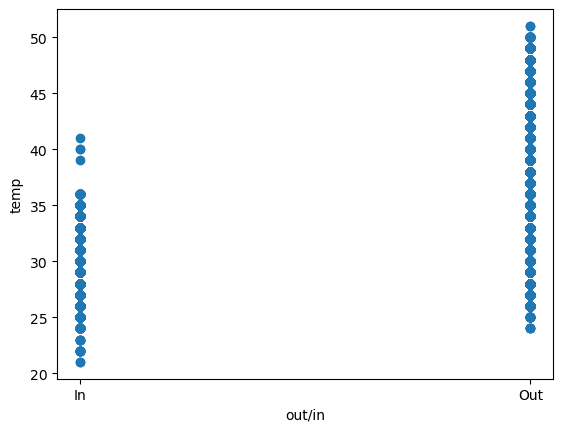

In [7]:
plt.scatter (data['out/in'], data['temp'])
plt.xlabel ('out/in')
plt.ylabel ('temp')


plt.show()

In [8]:
new_data = data.groupby(['noted_date','out/in']).temp.mean().reset_index()
new_data = new_data.pivot(index = 'noted_date',columns = 'out/in', values = 'temp').reset_index().dropna()


In [9]:
new_data

out/in,noted_date,In,Out
90,01-11-2018 05:46,30.0,44.0
94,01-11-2018 06:02,30.0,44.0
99,01-11-2018 06:20,30.0,45.0
100,01-11-2018 06:22,30.0,45.0
121,01-11-2018 07:22,30.0,45.0
...,...,...,...
27710,31-10-2018 08:50,31.0,46.0
27731,31-10-2018 10:14,30.0,45.0
27742,31-10-2018 10:49,30.0,45.0
27745,31-10-2018 10:57,30.0,46.0


<Axes: xlabel='Out', ylabel='In'>

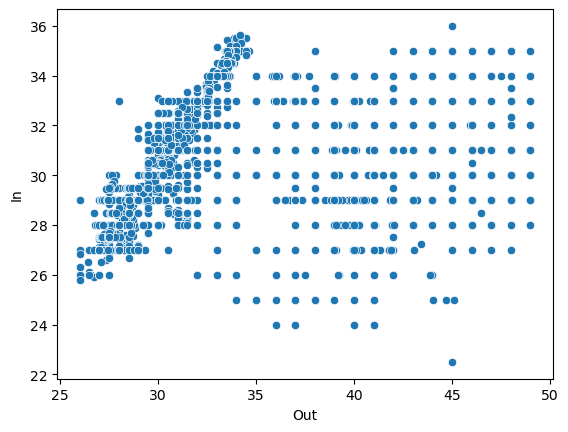

In [10]:
sns.scatterplot(x =new_data['Out'], y = new_data['In'])


<Axes: xlabel='Out', ylabel='In'>

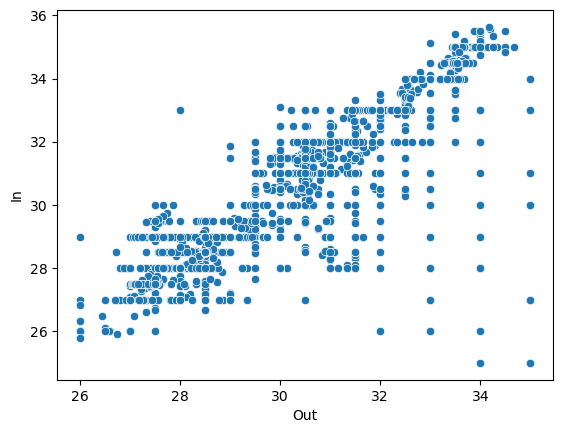

In [11]:
sns.scatterplot(x = new_data.loc[new_data['Out'] <=35]['Out'], y = new_data.loc[new_data['Out']<=35]['In'])

In [12]:
corr_coef = np.corrcoef(new_data.loc[new_data['Out'] <=35]['Out'], new_data.loc[new_data['Out']<=35]['In']) [0,1]
corr_coef

0.7887594885141674

In [13]:
#out la bien doc lap la x
#khong co nhieu bien doc lap nen khong kiem tra duoc cac bien doc lap co tuong quan voi nhau 
#in la phu thuoc la y
x = (new_data.loc[new_data['Out'] <=35]['Out'])
y = (new_data.loc[new_data['Out']<=35]['In'])


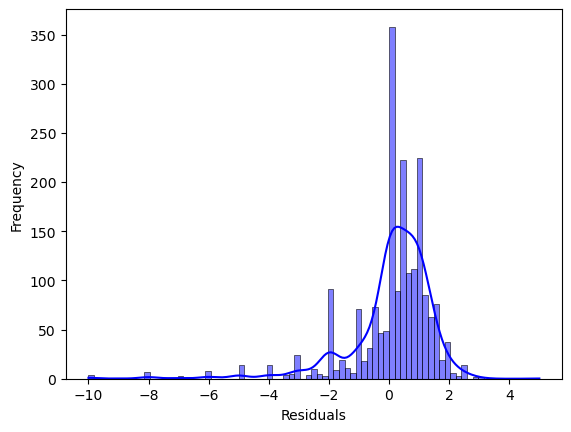

In [14]:

residuals = (y - x)

sns.histplot(residuals, kde = True, color = 'b')
plt.xlabel ('Residuals')
plt.ylabel ('Frequency')

plt.show()

In [15]:
residuals

1596     1.500000
1598     1.000000
1599     1.000000
1600     1.076923
1601     1.000000
           ...   
24467   -0.500000
26392   -1.500000
26394   -0.250000
27530   -1.500000
27531   -2.000000
Length: 1951, dtype: float64

In [16]:
residuals_variance = np.var (residuals)
residuals_variance
#phuong sai

2.139091747708911

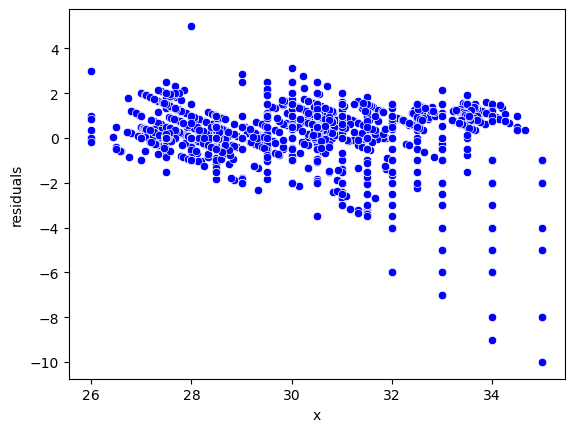

In [17]:

sns.scatterplot (x = x, y = residuals, color ='b')

plt.xlabel ('x')
plt.ylabel ('residuals')

plt.show()